# Task 3: Exploratory Data Analysis - Retail
## Author: Mahmoud Ahmed Shimy
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis (EDA
   )</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> I have selected the **SampleSuperStore** dataset to investigate it and do some **E**xploratory **D**ata **A**nalysis by exploring the correlations between the varies things on it and find patterns to find out the weak areas where you can work to make more profit by answering some question that we will ask now


#### Question(s) for Analysis
<ol>
<li>First question after importing and wrangling the data is What is the lowest Cities, States and Regions with total and average Profit? and starts <a href="#Q1">here</a></li>
<li>Also it is important for me to find some correlations between the varies columns <a href="#Q2">here</a></li>
<li>What is the biggest Cities, States and Regions offering Discounts? <a href="#Q4">here</a></li>
<li>Finally we need to investigate more further in the areas that needs to work more to make more profits and starts <a href="#Q7">here</a></li>
</ol>

### importing Liberaries and DataFrame
>This section is to import the necessary liberaries and DataFrame

In [2]:
# for data frames
import pandas as pd
# for numerical fn.
import numpy as np
# for data visualization
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling section
> In this section we will do some gathering, assessing and cleaning to the data to be more suatable and easy to analyse

In [4]:
df = pd.read_csv("SampleSuperstore.csv")
df.sample(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
4796,Standard Class,Corporate,United States,Jacksonville,Florida,32216,South,Office Supplies,Binders,57.582,3,0.7,-44.1462
6316,Standard Class,Corporate,United States,Jackson,Michigan,49201,Central,Office Supplies,Paper,144.120,3,0.0,69.1776


In [5]:
df.shape

(9994, 13)

Now we know that the data has nearly 10k observations and 13 column.

Lets look at the first 3 observations.

In [6]:
df.head(3)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.62,2,0.0,6.8714


lets take look at the columns names and data types and the number of the missing data on each one

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000



### Data Cleaning
> After gathering the data looks good so let's take a look on null values and duplicated.

In [9]:
df.Country.value_counts()

United States    9994
Name: Country, dtype: int64

There's only one country so we can drop this column

In [10]:
df.drop(columns='Country', inplace=True)

Now we can drop all Null values from the dataframe

In [11]:
df.dropna(inplace=True)

Finally for cleaning the data let's take look at the number of duplicated values and drop them

In [12]:
df.duplicated().sum()

17

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   City          9977 non-null   object 
 3   State         9977 non-null   object 
 4   Postal Code   9977 non-null   int64  
 5   Region        9977 non-null   object 
 6   Category      9977 non-null   object 
 7   Sub-Category  9977 non-null   object 
 8   Sales         9977 non-null   float64
 9   Quantity      9977 non-null   int64  
 10  Discount      9977 non-null   float64
 11  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 1013.3+ KB


Now we have cleaned data without missing or duplicated values and ready to be explored

<a id='eda'></a>
## Exploring Data Section (EDA)
> After wrangling the data, In this section we will answer some questions by analysing the data to create some Conclusions about the dataframe.
> All these questions is from my deep mind and of course you may have different questions so don't be restricted by this questions.

In [13]:
# pip install ipywidgets
# pip install pandas-profiling

In [14]:
from pandas_profiling import ProfileReport

C:\Users\ip\AppData\Local\Temp\ipykernel_8460\2274191625.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [15]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
df.sample(2)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2335,Same Day,Consumer,Fairfield,Connecticut,6824,East,Office Supplies,Envelopes,10.86,3,0.0,5.1042
9704,Standard Class,Home Office,Wilmington,Delaware,19805,East,Office Supplies,Binders,11.01,3,0.0,5.3949


## Uni-variate analysis

In [17]:
# City
df["City"].value_counts()[:5]

New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
Name: City, dtype: int64

In [18]:
# State
df["State"].value_counts()[:5]

California      1996
New York        1127
Texas            983
Pennsylvania     586
Washington       502
Name: State, dtype: int64

In [19]:
# Region
df["Region"].value_counts()[:5]

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

In [20]:
# Numerical Data
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


## Bi-Variate analysis
<a id='Q1'></a>
#### Q1: What is the lowest Cities with total and average Profit?

In [21]:
def pltbar(datax, datay, namex, namey):
    plt.bar(
    x = datax,
    height = datay
    )
    plt.xlabel(namex, fontsize = 15)
    plt.ylabel(namey, fontsize = 15)

In [22]:
df.sample(3)

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
1509,First Class,Consumer,Los Angeles,California,90036,West,Furniture,Furnishings,8.360,2,0.0,3.0096
3547,First Class,Home Office,Richmond,Kentucky,40475,South,Office Supplies,Supplies,35.060,2,0.0,10.5180
7591,Standard Class,Consumer,Philadelphia,Pennsylvania,19134,East,Furniture,Chairs,71.246,2,0.3,-19.3382


In [23]:
df.groupby(df["City"]).sum().sort_values(['Profit']).Profit[:5]

City
Philadelphia   -13843.2106
Houston        -10175.1755
San Antonio     -7299.0502
Lancaster       -7239.0684
Chicago         -6648.3318
Name: Profit, dtype: float64

Text(0.5, 1.0, 'The lowest Cities with total Profit')

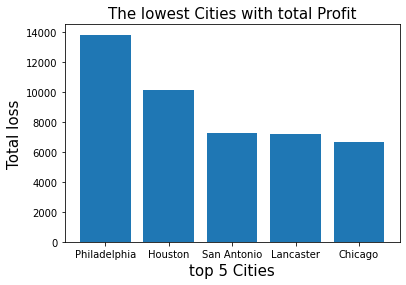

In [24]:
pltbar(df.groupby(df["City"]).sum().sort_values(['Profit']).Profit[:5].index, df.groupby(df["City"]).sum().sort_values(['Profit']).Profit[:5].values*-1, "top 5 Cities", "Total loss")
plt.title("The lowest Cities with total Profit", fontsize = 15)

In [25]:
df.groupby(df["City"]).mean().sort_values(['Profit']).Profit[:5]

City
Bethlehem    -200.619160
Champaign    -182.352000
Oswego       -178.709200
Round Rock   -169.061614
Lancaster    -157.371052
Name: Profit, dtype: float64

Text(0.5, 1.0, 'The lowest Cities with average Profit')

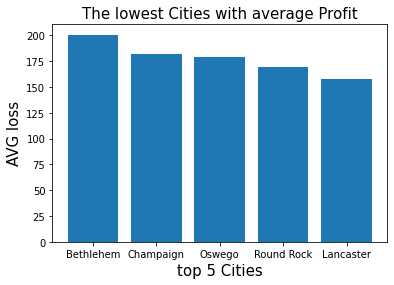

In [26]:
pltbar(df.groupby(df["City"]).mean().sort_values(['Profit']).Profit[:5].index, df.groupby(df["City"]).mean().sort_values(['Profit']).Profit[:5].values*-1, "top 5 Cities", "AVG loss")
plt.title("The lowest Cities with average Profit", fontsize = 15)

#### Q2: What is the lowest States with total and average Profit?

In [27]:
df.groupby(df["State"]).sum().sort_values(['Profit']).Profit[:5]

State
Texas            -25750.9833
Ohio             -16959.3178
Pennsylvania     -15565.4035
Illinois         -12601.6500
North Carolina    -7490.9122
Name: Profit, dtype: float64

Text(0.5, 1.0, 'The lowest States with Total Profit')

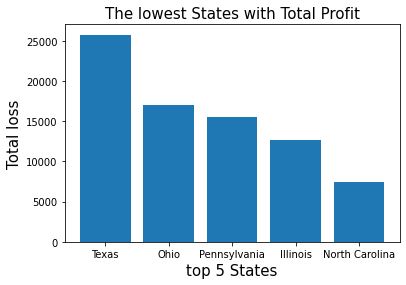

In [28]:
pltbar(df.groupby(df["State"]).sum().sort_values(['Profit']).Profit[:5].index, df.groupby(df["State"]).sum().sort_values(['Profit']).Profit[:5].values*-1, "top 5 States", "Total loss")
plt.title("The lowest States with Total Profit", fontsize = 15)

In [29]:
df.groupby(df["State"]).mean().sort_values(['Profit']).Profit[:5]

State
Ohio             -36.237859
Colorado         -35.867351
North Carolina   -30.083985
Tennessee        -29.189583
Pennsylvania     -26.562122
Name: Profit, dtype: float64

Text(0.5, 1.0, 'The lowest States with average Profit')

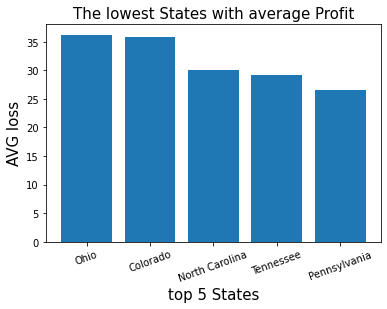

In [30]:
pltbar(df.groupby(df["State"]).mean().sort_values(['Profit']).Profit[:5].index, df.groupby(df["State"]).mean().sort_values(['Profit']).Profit[:5].values*-1, "top 5 States", "AVG loss")
plt.xticks(rotation = 20)
plt.title("The lowest States with average Profit", fontsize = 15)

#### Q3: What is the lowest Region with total and average Profit?

In [31]:
df.groupby(df["Region"]).sum().sort_values(['Profit']).Profit[:5]

Region
Central     39655.8752
South       46749.4303
East        91506.3092
West       108329.8079
Name: Profit, dtype: float64

Text(0.5, 1.0, 'Regions with total Profit')

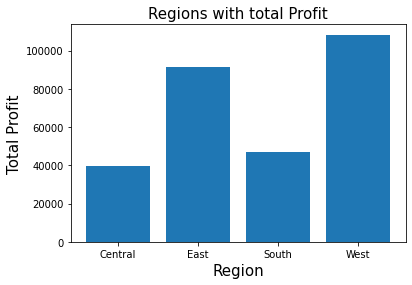

In [32]:
pltbar(df.groupby(df["Region"]).sum().index, df.groupby(df["Region"]).sum().Profit.values, "Region", "Total Profit")
plt.title("Regions with total Profit", fontsize = 15)

In [33]:
df.groupby(df["Region"]).mean().sort_values(['Profit']).Profit

Region
Central    17.100421
South      28.857673
East       32.163905
West       33.927281
Name: Profit, dtype: float64

Text(0.5, 1.0, 'Regions with average Profit')

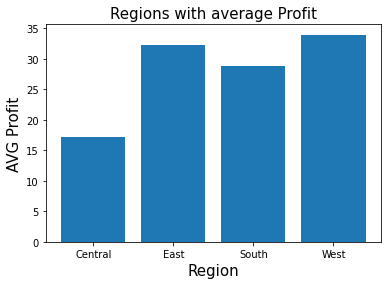

In [34]:
pltbar(df.groupby(df["Region"]).mean().index, df.groupby(df["Region"]).mean().Profit.values, "Region", "AVG Profit")
plt.title("Regions with average Profit", fontsize = 15)

<a id='Q2'></a>
### Checking out some correlations

Text(0, 0.5, 'Profit')

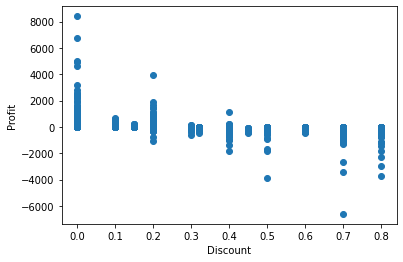

In [35]:
plt.scatter(x = df.Discount, y = df.Profit)
plt.xlabel('Discount')
plt.ylabel('Profit')

In [36]:
df.Profit.corr(df.Discount)

-0.21966206449082393

After showing the plot and calculating correlation we see that there's a negative correlation between the profit and Discount = -2.19
<a id='Q4'></a>
#### Q4:What is the biggest Cities offering Discounts?

In [37]:
df[df.Discount > 0].groupby(df["City"]).sum().sort_values(['Discount'], ascending=False)[:5] 

,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,
Philadelphia,10256182,109061.4610,1978,175.30,-13843.2106
Houston,28898305,64441.2564,1460,142.74,-10175.1755
Chicago,18976595,48535.9770,1129,119.70,-6648.3318
Dallas,11802703,20131.9322,555,56.30,-2846.5257
Los Angeles,25298563,111540.6410,1059,55.50,12697.4120


Text(0.5, 1.0, 'The highest Cities with total discount')

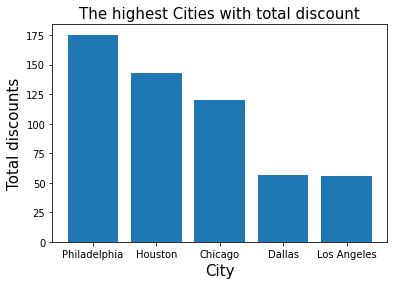

In [38]:
pltbar(df.groupby(df["City"]).sum().sort_values(['Discount'], ascending=False)[:5].index, df.groupby(df["City"]).sum().sort_values(['Discount'], ascending=False)[:5] .Discount.values, 'City', 'Total discounts')
plt.title("The highest Cities with total discount", fontsize = 15)

#### Q5:What is the biggest States offering Discounts?

In [39]:
df.groupby(df["State"]).mean().sort_values(['Discount'], ascending=False)[:5]

,Postal Code,Sales,Quantity,Discount,Profit
State,,,,,
Illinois,60719.183299,163.263823,3.751527,0.389206,-25.665275
Texas,76900.926755,173.066675,3.782299,0.370539,-26.196321
Pennsylvania,19063.899317,198.799253,3.668942,0.328840,-26.562122
Ohio,43881.638889,166.617017,3.754274,0.325000,-36.237859
Colorado,80295.758242,176.418231,3.807692,0.316484,-35.867351


Text(0.5, 1.0, 'The highest states with AVG discount')

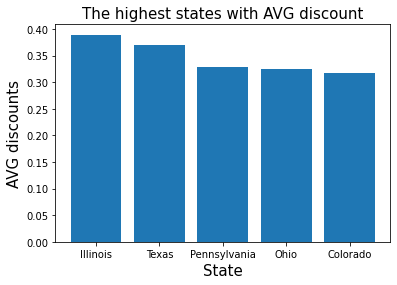

In [40]:
pltbar(df.groupby(df["State"]).mean().sort_values(['Discount'], ascending=False)[:5].index, df.groupby(df["State"]).mean().sort_values(['Discount'], ascending=False)[:5].Discount.values, 'State', 'AVG discounts')
plt.title("The highest states with AVG discount", fontsize = 15)

#### Q6:What is the biggest Regions offering Discounts ?

In [41]:
df.groupby(df["Region"]).mean().sort_values(['Discount'], ascending=False)

,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
Central,65339.882708,215.947759,3.780940,0.240250,17.100421
South,34490.772840,241.803645,3.832716,0.147253,28.857673
East,17609.609139,238.465798,3.728998,0.145343,32.163905
West,91695.427184,227.139254,3.831506,0.109615,33.927281


Text(0.5, 1.0, 'Regions with AVG discounts')

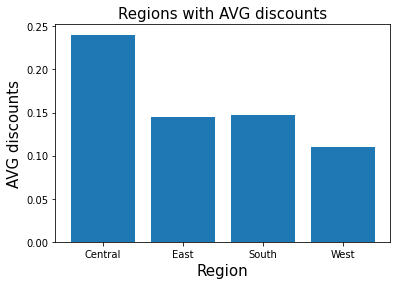

In [42]:
pltbar(df.groupby(df["Region"]).mean().index, df.groupby(df["Region"]).mean().Discount.values, 'Region', 'AVG discounts')
plt.title("Regions with AVG discounts", fontsize = 15)

<a id='Q7'></a>
## Multi-Variate analysis
#### Q7: The  lowest Profit State in Centeral Region

In [43]:
df[df['Region'] == "Central"].groupby(df.State).sum().sort_values(["Profit"])[:5]

,Postal Code,Sales,Quantity,Discount,Profit
State,,,,,
Texas,75593611,170124.5418,3718,364.24,-25750.9833
Illinois,29813119,80162.5370,1842,191.10,-12601.6500
North Dakota,406721,919.9100,30,0.00,230.1497
South Dakota,686730,1315.5600,42,0.00,394.8283
Kansas,1603798,2914.3100,74,0.00,836.4435


#### Q8: The  lowest Profit City in Texas State

In [44]:
df[df.State == "Texas"].groupby(df.City).sum().sort_values(["Profit"])[:5]

,Postal Code,Sales,Quantity,Discount,Profit
City,,,,,
Houston,28898305,64441.2564,1460,142.74,-10175.1755
San Antonio,4614213,21843.5280,247,22.60,-7299.0502
Dallas,11802703,20131.9322,555,56.30,-2846.5257
Round Rock,550648,4854.0528,23,1.92,-1183.4313
Huntsville,2010840,6710.6168,121,10.62,-843.4264


In [15]:
df.to_csv("Modified")

<a id='conclusions'></a>
## Conclusions
> **After investigating the data frame we knew the following:**
    <ul style="line-height:180%">
        <li>
            <ul style="list-style-type:circle ; line-height:150%">
                <li>The best selling Region is **West**</li>
                <li>The best selling State is **California**</li>
                <li>The best selling City is **New York City**</li>
            </ul>
        </li>
        <li>The Average profit per unit is **7.56**</li>
        <li>The lowest Region with total profit is **Central** Region with $39655$ profit</li>
        <li>The lowest State with total profit is **Texas** with $25751$ Total loss</li>
        <li>The lowest City with total profit is **Philadelphia** with $13843$ Total loss</li>
        <li>The lowest City with total profit in Texas State in Central region is **Houston** with $10175$ Total loss and 27% discount per sell</li>
        <li>There's a **Negative** correlation between the Profit and Discount = -$0.219$</li>
        <li>The heighest Region offering discounts is the **Central** Region with an average 24% discount per sell</li>
        <li>The second heighest State offering discounts is **Texas** with 37%</li>
        <li>The heighest City offering discounts is **Philadelphia** with $1978$ discount offers</li>
    </ul>
    > **Recommendation:** <br>
    Finally we recommend to lower the discount in some areas like **Philadelphia** City in East Region and **Houston** City in Texas State and **Texas, Illinios** States in **Central** region on general to raise the profit.
## DataFrame limitations
> Fortunately there's no big limitations on this data frame hence the biggest problem that limited our investigate is the lack of timeseries data or timestamp in the data and if there was, we would uses it to investigate more and more in the data frame but generally i think we did great job on this data frame under these limitations.